In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import tensorflow as tf # tensorflow is library used to build a complex neural network,it basically devloped for large numerical computation.

In [12]:
print(tf.__version__)  # latest version of tensor flow

2.12.0


In [13]:
import pandas as pd
import numpy as np


In [14]:
data=pd.read_csv('Churn_Modelling.csv')

In [15]:
##  Problem statement:- To predict wheather a customer will leave the comapny or not
# Binary classification task
# Target veriable: Exited 1:yes 0:no

In [16]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Converison of categorical data here we will be used one hot encoding
Geography=pd.get_dummies(data.Geography,drop_first=True)
Gender=pd.get_dummies(data.Gender,drop_first=True)

In [18]:
# Concat to the data frame 
data=pd.concat([data,Geography,Gender],axis=1)

In [19]:
# Dropping the veriable because we are already encoded this feature
data.drop(['Geography','Gender'],axis=1,inplace=True)

# Defining Independant and Dependant veriable

In [20]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [21]:
X=data.loc[:,['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Germany', 'Spain', 'Male']]
y=data.Exited

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [23]:
X # Independant veriable

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Spilt the data into Training and Texting Data

In [24]:
## Training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [25]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2294,591,33,9,131765.72,1,1,0,118782.06,0,0,1
2808,654,42,7,99263.09,1,1,1,67607.90,0,0,1
6480,679,24,6,114948.76,2,0,1,135768.25,0,0,0
9202,528,31,9,120962.59,1,1,0,5419.31,0,0,1
3111,623,42,1,149332.48,2,1,0,100834.22,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3915,686,43,2,134896.03,1,1,1,97847.05,1,0,1
9620,561,37,4,101470.29,1,0,1,88838.14,0,1,1
7068,699,54,3,111009.32,1,1,1,155905.79,1,0,0
7391,430,31,5,0.00,1,1,0,95655.16,0,0,1


In [26]:
X_train.shape

(7500, 11)

# Scaling 

In [27]:
# Feature Scaling with standard scalar mean is 0 and std is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # For training we do fit_transform
X_test = sc.transform(X_test) # For test we only transform the data

# Model Creation Importing Library

In [28]:
from tensorflow.keras.models import Sequential # Here we will be use sequntial model
from tensorflow.keras.layers import Dense # Connectivity done with the help of layers
from tensorflow.keras.layers import Dropout

In [29]:
# Step:1 Defining the model
model=Sequential()

In [30]:
# Adding input layer to first hidden layer
model.add(Dense(units=11,input_dim=11,activation='relu',kernel_initializer='he_uniform'))

# Adding first hidden layer to second hidden layer
model.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform'))

# Adding second hidden layer to third hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))

# Adding third hidden layer to output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer = 'glorot_uniform'))
# if we are perform multiclass classification that time we are use 3 unit and activation function is softmax

In [31]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# fit the keras model on the dataset
model_history=model.fit(X_train, y_train, epochs=15,validation_split=0.33, batch_size=10)
# epoch means training phase
# Validation set use to validate the model
# Testing set use to test the model
# batch size: passing the records

Epoch 1/15
503/503 [==============================] - 3s 3ms/step - loss: 0.5648 - accuracy: 0.7381 - val_loss: 0.4723 - val_accuracy: 0.7989
Epoch 2/15
503/503 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.7860 - val_loss: 0.4469 - val_accuracy: 0.8033
Epoch 3/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7934 - val_loss: 0.4310 - val_accuracy: 0.8090
Epoch 4/15
503/503 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7982 - val_loss: 0.4236 - val_accuracy: 0.8179
Epoch 5/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.8057 - val_loss: 0.4127 - val_accuracy: 0.8195
Epoch 6/15
503/503 [==============================] - 2s 4ms/step - loss: 0.4208 - accuracy: 0.8119 - val_loss: 0.4045 - val_accuracy: 0.8292
Epoch 7/15
503/503 [==============================] - 2s 4ms/step - loss: 0.4140 - accuracy: 0.8161 - val_loss: 0.4057 - val_accuracy: 0.8296
Epoch 

# Model Evaluation

In [33]:
...
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
accuracy

79/79 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8484


[0.379645973443985, 0.8483999967575073]

In [34]:
X_train.shape

(7500, 11)

In [35]:
# list all data in history
print(model_history.history.keys()) 
# Keys = gives the all parameter of evalute 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


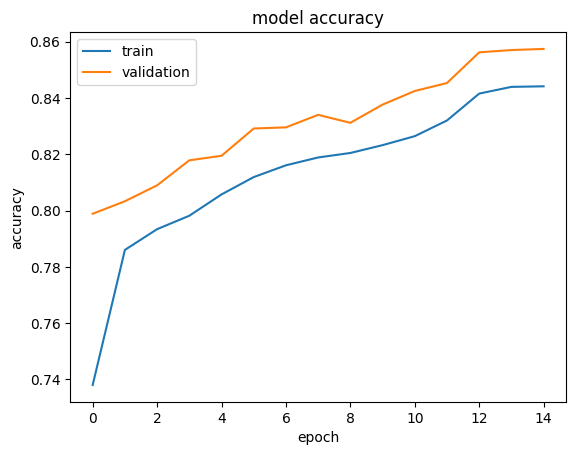

In [36]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

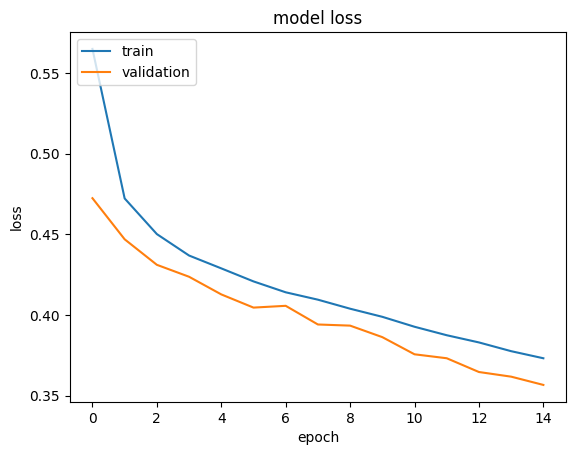

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # 0.5 is thershold of binary classification

79/79 [==============================] - 0s 1ms/step


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1936,   86],
       [ 293,  185]])

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8484